In [ ]:
#problem statement: Implement an RNN to classify the sentiment of movie reviews from the IMDB dataset. Experiment with LSTM and GRU cells, and compare their effectiveness in capturing sequential information in text data.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout


In [2]:
# Load the IMDB dataset
max_features = 10000  # Only keep top 10,000 most frequent words
max_len = 200         # Maximum sequence length of each review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure they all have the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (25000, 200)
Test data shape: (25000, 200)


In [3]:
def build_model(rnn_cell='LSTM'):
    model = Sequential()
    
    # Embedding layer converts word indices into dense vectors of size 128
    model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
    
    # Add RNN layer (LSTM or GRU)
    if rnn_cell == 'LSTM':
        model.add(LSTM(128, return_sequences=False))  # LSTM layer
    elif rnn_cell == 'GRU':
        model.add(GRU(128, return_sequences=False))   # GRU layer
    
    # Add a Dropout layer for regularization
    model.add(Dropout(0.5))
    
    # Output layer: single unit for binary classification (sentiment)
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model with binary crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [4]:
# Build LSTM model
model_lstm = build_model('LSTM')

# Build GRU model
model_gru = build_model('GRU')


C:\Users\vedan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Train the LSTM model
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Train the GRU model
history_gru = model_gru.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 131ms/step - accuracy: 0.7122 - loss: 0.5470 - val_accuracy: 0.8532 - val_loss: 0.3463
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.8878 - loss: 0.2807 - val_accuracy: 0.8536 - val_loss: 0.3402
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.9288 - loss: 0.2009 - val_accuracy: 0.8724 - val_loss: 0.3332
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.9560 - loss: 0.1258 - val_accuracy: 0.8084 - val_loss: 0.4341
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.9513 - loss: 0.1318 - val_accuracy: 0.8606 - val_loss: 0.4140
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 164ms/step - accuracy: 0.6560 - loss: 0.5850 - val_accuracy: 0.8538 - val_loss: 0.3535
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 157ms/step - accuracy: 0.8957 - loss: 0.2676 - val_accuracy: 0.8692 - val_loss: 0.3106
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.9399 - loss: 0.1700 - 

In [6]:
# Evaluate LSTM model on test data
lstm_results = model_lstm.evaluate(x_test, y_test)

# Evaluate GRU model on test data
gru_results = model_gru.evaluate(x_test, y_test)

# Display the results
print(f"LSTM Test Accuracy: {lstm_results[1]}")
print(f"GRU Test Accuracy: {gru_results[1]}")



782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8495 - loss: 0.4483
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8605 - loss: 0.4972
LSTM Test Accuracy: 0.8528800010681152
GRU Test Accuracy: 0.8628399968147278


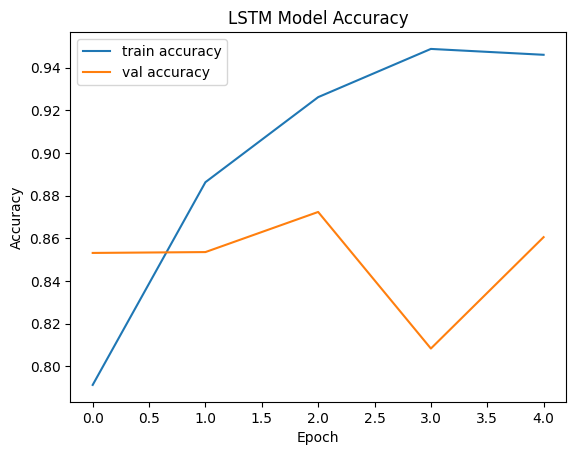

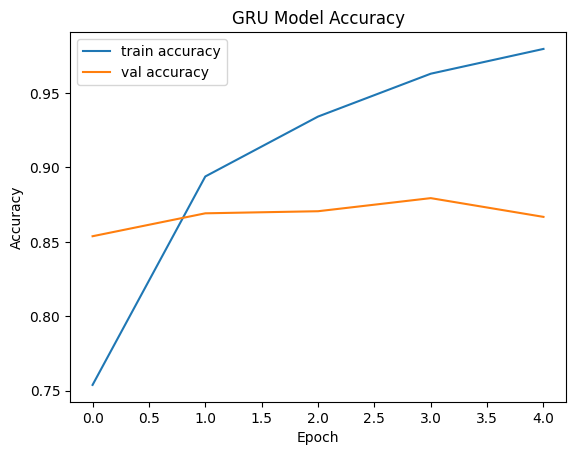

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Plot accuracy for LSTM and GRU
plot_history(history_lstm, "LSTM Model Accuracy")
plot_history(history_gru, "GRU Model Accuracy")
